## Regressão Linear - 1D

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Base de Dados

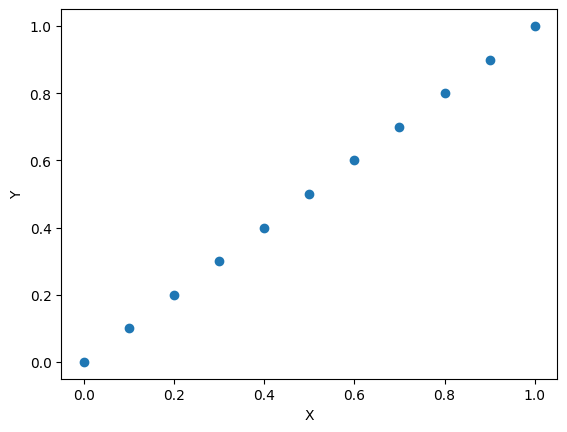

In [7]:
X = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] #features
Y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] #target
plt.scatter(X,Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

### Machine Learning "From scratch"

Modelo Matemático:

$x \rightarrow{}$ feature

$y \rightarrow{}$ target

$\hat{y_{i}} = w_1x_{i}+w_0$ $\rightarrow{}$ target estimado pela equação da reta

$Erro(i) = (\hat{y_{i}}-y_{i})^{2} \rightarrow{}$ erro gerado para cada linha da base de dados

$Custo(\hat{y_{i}})= Custo(w_{1}, w_{0}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i})^{2} \rightarrow{}$ função custo para cada equação da reta considerada

$\frac{\partial (Custo)}{\partial w_{1}} = \frac{\partial (Custo)}{\partial \hat{y_{i}}} \frac{\partial \hat{y_{i}}}{\partial w_{1}}  = \frac{2}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i})x_{i} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{1}$ da equação da reta

$\frac{\partial (Custo)}{\partial w_{0}} = \frac{\partial (Custo)}{\partial \hat{y_{i}}} \frac{\partial \hat{y_{i}}}{\partial w_{0}}  = \frac{2}{N}\sum_{i=1}^{N}(\hat{y_{i}}-y_{i}) \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{0}$ da equação da reta

$\frac{\partial (Custo)}{\partial w_{1}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmtero $w_{1}$

$\frac{\partial (Custo)}{\partial w_{0}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmtero $w_{0}$

Modelo computacional:

- escolher parâmetros inciais $w_{1}$ e $w_{0}$
- calcular $\hat{y_{i}}$ para todas as linhas da base de dados
- calcular função Custo
- atualizar os parâmetros $w_{1}$ e $w_{0}$ a cada iteração, fazendo:
    - $w_{1} \leftarrow w_{1}-\alpha \frac{\partial (Custo)}{\partial w_{1}}$
    - $w_{0} \leftarrow w_{0}-\alpha \frac{\partial (Custo)}{\partial w_{0}}$



Custo em 999 iterações =  3.1546186040995326e-08
w1 = 0.999833627292727 w0 = 9.028814637074643e-05


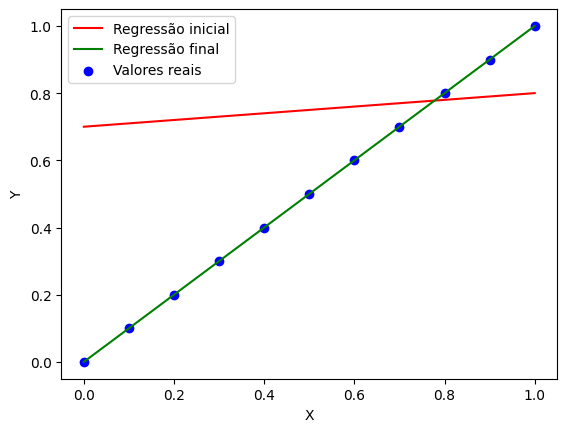

In [8]:

#Parâmetros inicais
w1 = 0.1
w0 = 0.7 #intercept
alpha = 0.01
iteracoes = 1000
costs = []

fig, ax = plt.subplots()
ax.plot(X, np.multiply(w1, X) + w0, 'r-', label = 'Regressão inicial')
ax.legend()
plt.ylabel('Y')
plt.xlabel('X')

#Loop de iteracoes para o gradiente convergir para o valor minimo
for i in range(iteracoes):

#Função Custo
    Y_pred = np.multiply(w1, X) + w0 #y_chapeu
    Loss_error = (Y_pred - Y)**2 #Erro de cada linha da base
    cost = np.sum(Loss_error) #funcao Custo
    
#Gradiente
    dw0 = np.sum((Y_pred - Y))
    dw1 = np.dot((Y_pred - Y), X)
    costs.append(cost)
    w1 = w1 - alpha*dw1
    w0 = w0 - alpha*dw0
    
    if i == (iteracoes-1):
        
        print("Custo em", i,"iterações = ", cost)
        print("w1 =",w1, "w0 =", w0)
        ax.plot(X, np.multiply(w1, X) + w0, 'g-', label = 'Regressão final')
        ax.scatter(X, Y, color='blue', label = 'Valores reais')
        ax.legend(loc = 'best')
        plt.show()

### Resultados

w1 =  0.999833627292727 & w0 =  9.028814637074643e-05


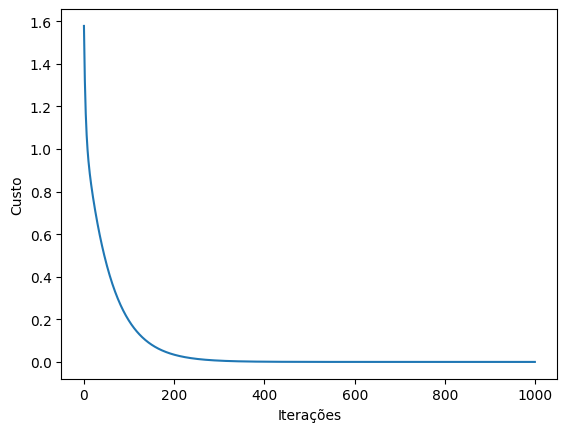

In [9]:
print("w1 = ", w1,"& w0 = ",  w0)
plt.plot(costs)
plt.ylabel('Custo')
plt.xlabel('Iterações')
plt.show()

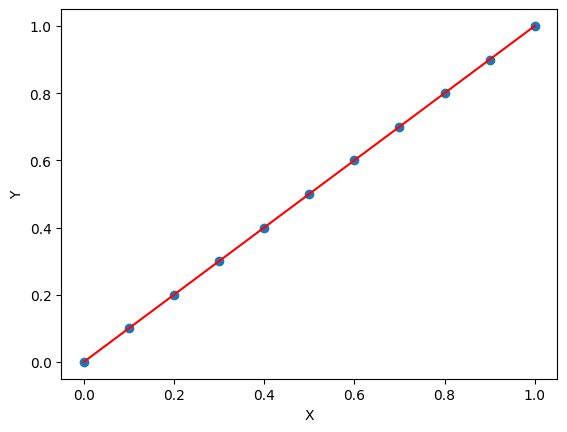

In [10]:
plt.plot(X,np.multiply(w1, X) + w0, 'red')
plt.scatter(X,Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

### API

In [23]:
nova_entrada_X = 1.2

y_estimado = nova_entrada_X*w1 + w0

print('O valor estimado para a entrada:', nova_entrada_X, 'é', y_estimado)

O valor estimado para a entrada: 1.2 é 1.199890640897643


### Machine Learning com Sklearn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X_sk = np.array(X)
Y_sk = np.array(Y)
Y_sk.shape

(11,)

In [26]:
lm = LinearRegression()
lm.fit(X_sk.reshape(-1,1),Y_sk)

LinearRegression()

### Resultados

In [27]:
print('wi, i>0: \n', lm.coef_)
print('w0: \n', lm.intercept_)

wi, i>0: 
 [1.]
w0: 
 -1.1102230246251565e-16


In [28]:
predictions = lm.predict(X_sk.reshape(-1,1))

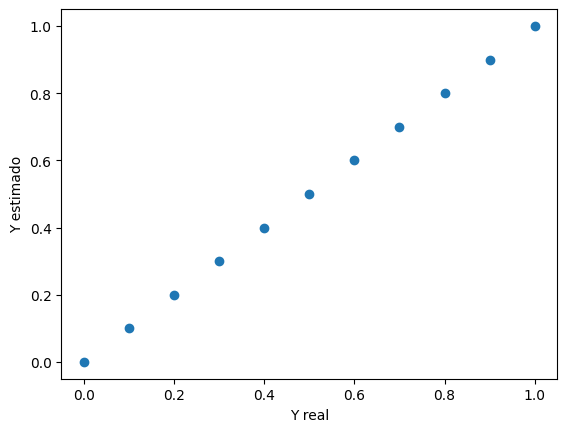

In [29]:
plt.scatter(Y_sk,predictions)
plt.xlabel('Y real')
plt.ylabel('Y estimado')
plt.show()

### API

In [30]:
nova_entrada_X = 1.2

y_estimado = nova_entrada_X*lm.coef_ + lm.intercept_

print('O valor estimado para a entrada:', nova_entrada_X, 'é', y_estimado)

O valor estimado para a entrada: 1.2 é [1.2]
